In [1416]:
import pandas as pd
import numpy as np

In [1417]:
data = pd.read_csv('USA_Housing.csv')

In [1418]:
data.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [1419]:
data.shape

(5000, 7)

In [1420]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [1421]:
data.drop_duplicates(inplace=True)

Taking two features for easy visualisation and analysis

In [1422]:
data = data[['Avg. Area Income','Price']]

In [1423]:
data.describe()

,Avg. Area Income,Price
count,5000.000000,5.000000e+03
mean,68583.108984,1.232073e+06
std,10657.991214,3.531176e+05
min,17796.631190,1.593866e+04
25%,61480.562388,9.975771e+05
50%,68804.286404,1.232669e+06
75%,75783.338666,1.471210e+06
max,107701.748378,2.469066e+06


In [1424]:
#Remove outlier

def find_outlier(data_column):

    sorted(data_column)
    q1,q3 = np.percentile(data_column,[25,75])
    IQR = q3-q1
    lb = q1 - 1.5*IQR
    ub = q3 + 1.5*IQR

    return lb,ub

In [1425]:
for i in data.keys():
    Lower_b,Upper_b = find_outlier(data[i])
    data.drop(data[(data[i] < Lower_b )| (data[i] > Upper_b)].index,inplace=True)

In [1426]:

cols = data.columns

In [1427]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [1428]:
data

,Avg. Area Income,Price
0,79545.458574,1.059034e+06
1,79248.642455,1.505891e+06
2,61287.067179,1.058988e+06
3,63345.240046,1.260617e+06
4,59982.197226,6.309435e+05
...,...,...
4995,60567.944140,1.060194e+06
4996,78491.275435,1.482618e+06
4997,63390.686886,1.030730e+06
4998,68001.331235,1.198657e+06


In [1429]:
data = pd.DataFrame(data,columns=cols)
data

,Avg. Area Income,Price
0,79545.458574,1.059034e+06
1,79248.642455,1.505891e+06
2,61287.067179,1.058988e+06
3,63345.240046,1.260617e+06
4,59982.197226,6.309435e+05
...,...,...
4995,60567.944140,1.060194e+06
4996,78491.275435,1.482618e+06
4997,63390.686886,1.030730e+06
4998,68001.331235,1.198657e+06


K Means Clustering 

In [1430]:
from sklearn.cluster import KMeans

# Kmeans with two cluster K=2
k_means = KMeans(n_clusters= 2,random_state=0)
k_means.fit(data)

KMeans(n_clusters=2, random_state=0)

In [1431]:
# fINDING THE INERTIA 
k_means.inertia_

198948258440304.16

In [1432]:
k_means.cluster_centers_

array([[  73688.77235374, 1503909.20441364],
       [  63422.7097976 ,  954434.15810585]])

In [1433]:
pred = k_means.predict(data)

In [1434]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data,pred)

In [1435]:
print(f"The silhouette score for {k_means.n_clusters} cluster is {score}")

The silhouette score for 2 cluster is 0.5572220473119934


Find the optimum number of clusters by using elbow method

<function matplotlib.pyplot.show(close=None, block=None)>

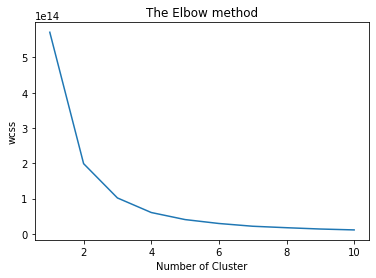

In [1436]:
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters= i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of Cluster')
plt.ylabel('wcss')
plt.show

Increasing the number of cluste K=3

In [1437]:
k_means_clus3 = KMeans(n_clusters=3,init = 'k-means++',random_state=0)

In [1438]:
pred_clust_3 = k_means_clus3.fit_predict(data)

In [1439]:
score = silhouette_score(data,pred_clust_3)
print(f"The silhouette score for {k_means_clus3.n_clusters} cluster is {score}")

The silhouette score for 3 cluster is 0.5281417307554377


In [1440]:
k_means_clust4 = KMeans(n_clusters=4,init = 'k-means++',random_state=0)
pred_clust_4 = k_means_clust4.fit_predict(data)
score = silhouette_score(data,pred_clust_4)
print(f"The silhouette score for {k_means_clust4.n_clusters} cluster is {score}")

The silhouette score for 4 cluster is 0.5254903620253587


In [1441]:
import plotly.express as px
clusters=pd.DataFrame(data,columns=data.columns)
clusters['label']=k_means_clust4.labels_

The number of data points in cluster

In [1442]:
pie=clusters.groupby('label').size().reset_index()
pie.columns=['cluster','value']
px.pie(pie,values='value',names='cluster',color=['red','blue','green','blueviolet'])

C:\Users\TONY\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\TONY\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\TONY\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

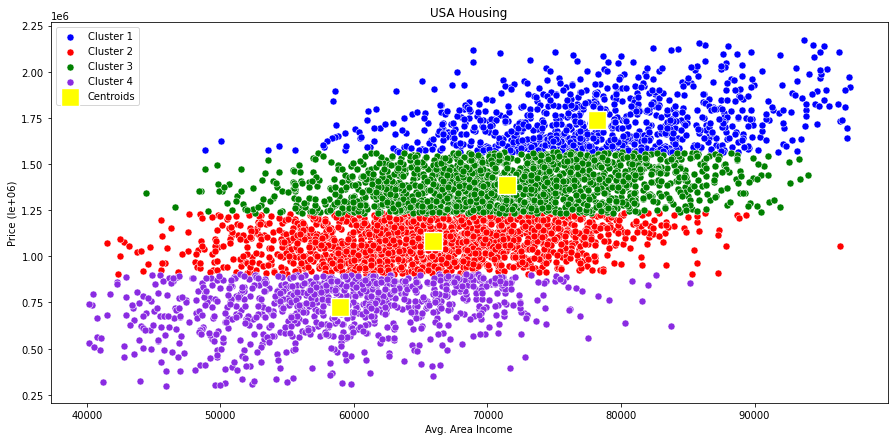

In [1443]:


data = np.array(data)
plt.figure(figsize=(15,7))
sns.scatterplot(data[pred_clust_4 == 0, 0], data[pred_clust_4 == 0, 1], color = 'blue', label = 'Cluster 1',s=50)
sns.scatterplot(data[pred_clust_4 == 1, 0], data[pred_clust_4 == 1, 1], color = 'red', label = 'Cluster 2',s=50)
sns.scatterplot(data[pred_clust_4 == 2, 0], data[pred_clust_4 == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(data[pred_clust_4 == 3, 0], data[pred_clust_4 == 3, 1], color = 'blueviolet', label = 'Cluster 4',s=50)

sns.scatterplot(k_means_clust4.cluster_centers_[:, 0], k_means_clust4.cluster_centers_[:, -1], color = 'yellow', label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('USA Housing')
plt.xlabel('Avg. Area Income')
plt.ylabel('Price (le+06)')
plt.legend()
plt.show()